<a href="https://colab.research.google.com/github/fabizap/Olist/blob/main/Actividad_Integradora_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

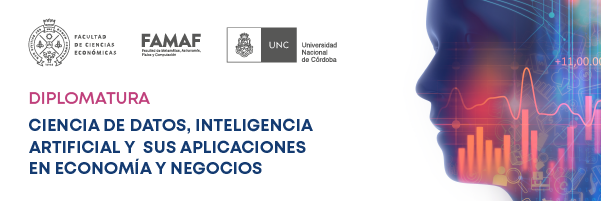



**Actividad Integradora**

---



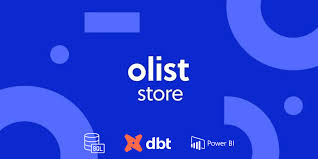

Se espera que al finalizar el proyecto este cuente con:

1. un **script** de programación en python, presentado en formato Notebook
2. un informe final del proceso y de la solución o propuesta de valor encontrada,
3. y una **presentación** para la exposición grupal.







#Consigna

## Etapas del proyecto
La actividad integradora se conforma por tres partes, en los cuales se plantea:
1. Definir estrategia de gestión de datos en ciencias económicas y aplicar herramientas
fundamentales para la limpieza y curación de datos y el análisis exploratorio de
datos (EDA).
2. Aplicar métodos cuantitativos en la ciencia de datos.
3. Aplicar inteligencia artificial a grandes volúmenes de datos.

# Primera etapa.
El objetivo de esta etapa es lograr un mejor entendimiento del problema, un profundo
conocimiento de las variables disponibles y sus interrelaciones.

● Realizar un análisis exploratorio de los datos que permita inferir sobre la
calidad y cantidad de los mismos aplicando técnicas propias para el set de
datos con el que decida trabajar.

● Aplicar técnicas de limpieza de datos, de ser necesario, para obtener una
base curada. Por ejemplo, visualizaciones, uso funciones básicas de python,
variables, tipos de variables, etc. Analizar cantidad de entradas nulas, outliers, valores extremos, máximos y mínimos de cada variable. Filtrado de
categorías, valores faltantes, datos erróneos, entre otros.

Checkpoint 1
Fecha de entrega: 07 agosto.
Presentar los avances en código Python en formato de Notebooks (archivos con extensión
“.ipynb”), incluyendo en el mismo las principales decisiones adoptadas en el proceso.
Fecha de feedback: hasta el 17 de agosto



# Las librerias


In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#CARGA de todos los dataframes

In [84]:
# Lista de URLs
urls = [
    'https://raw.githubusercontent.com/fabizap/Olist/main/olist_customers_dataset.csv',
    'https://raw.githubusercontent.com/fabizap/Olist/main/olist_order_items_dataset.csv',
    'https://raw.githubusercontent.com/fabizap/Olist/main/olist_order_payments_dataset.csv',
    'https://raw.githubusercontent.com/fabizap/Olist/main/olist_order_reviews_dataset.csv',
    'https://raw.githubusercontent.com/fabizap/Olist/main/olist_orders_dataset.csv',
    'https://raw.githubusercontent.com/fabizap/Olist/main/olist_products_dataset.csv',
    'https://raw.githubusercontent.com/fabizap/Olist/main/olist_sellers_dataset.csv',
    'https://raw.githubusercontent.com/fabizap/Olist/main/product_category_name_translation.csv'
]

# Cargar todos los DataFrames en un diccionario
dfs = {f'df{i+1}': pd.read_csv(url) for i, url in enumerate(urls)}

# Asignar los DataFrames a las variables correspondientes
for i in range(1, len(dfs) + 1):
    globals()[f'df{i}'] = dfs[f'df{i}']


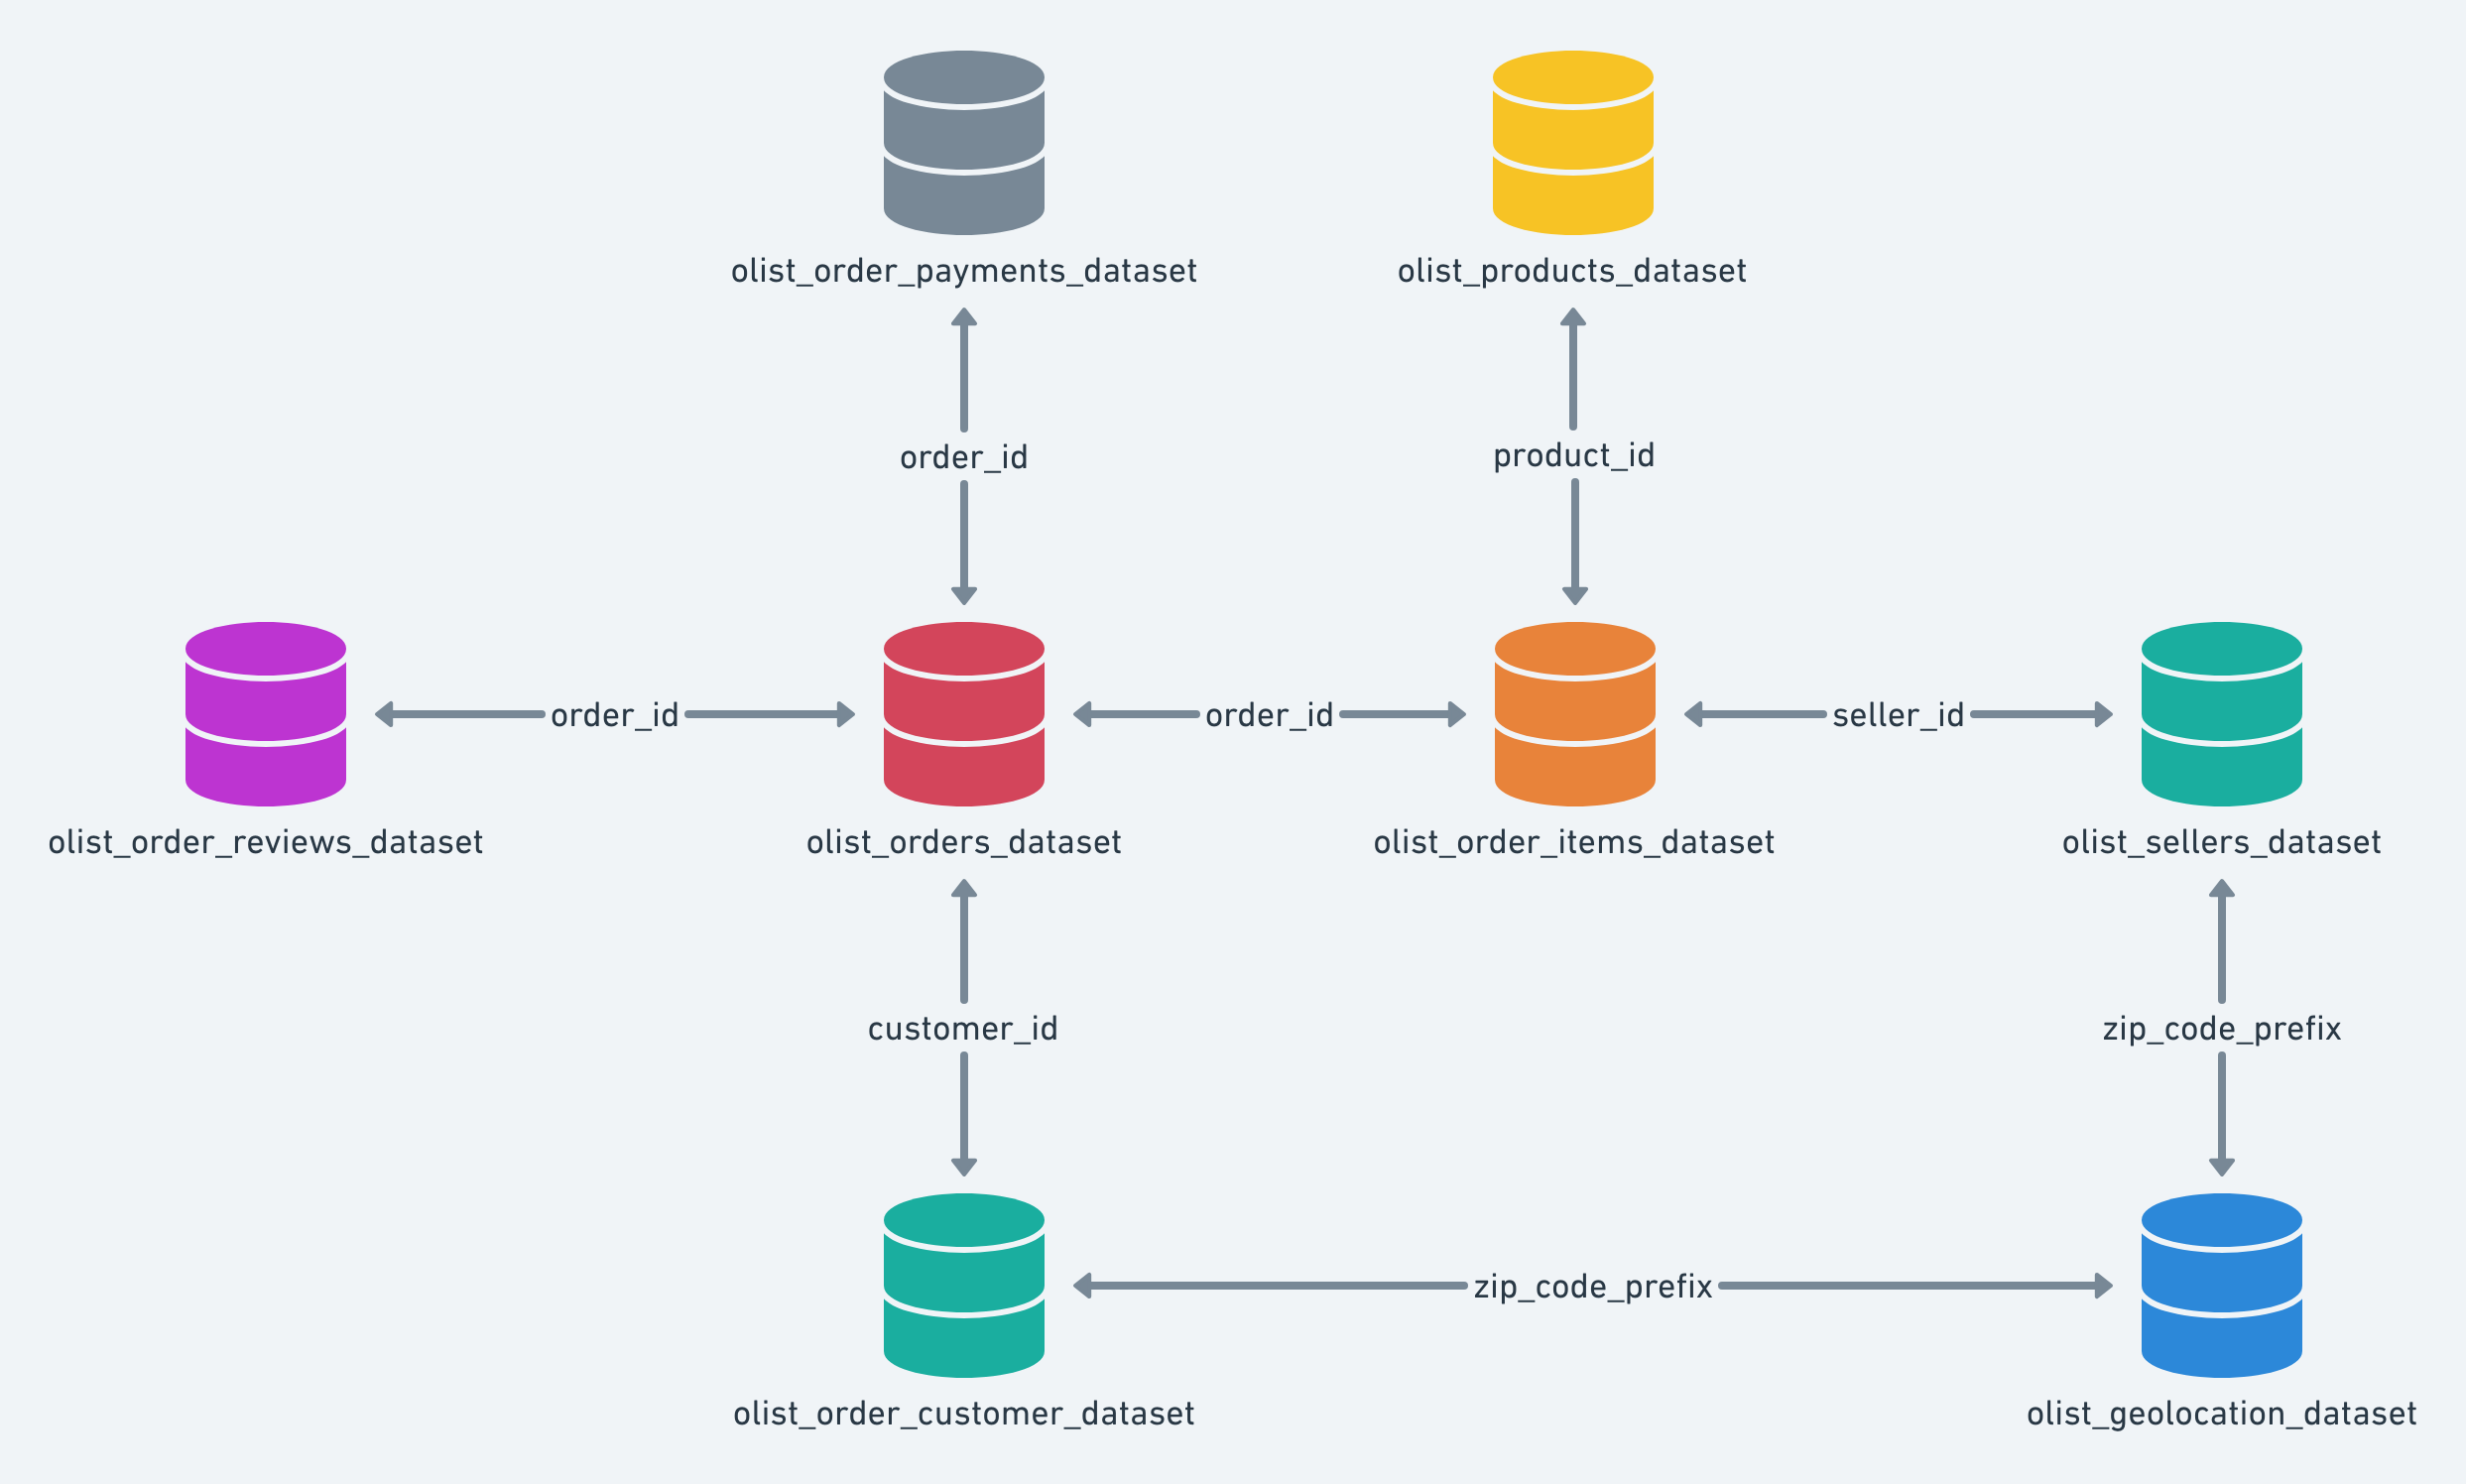

## Lista de los df (para consultas)
* df1 = customers_dataset.csv
* df2 = order_items_dataset.csv
* df3 = order_payments_dataset.csv
* df4 = order_reviews_dataset.csv
* df5 = orders_dataset.csv
* df6 = products_dataset.csv
* df7 = sellers_dataset.csv
* df8 = product_category_name_translation.csv

In [85]:
df1.shape

(99441, 5)

In [86]:
df2.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.3
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.9


## Variables en comun entre df

In [106]:
# Encuentra las columnas comunes entre df1 y df5
dataframes = [df1, df5]
column_names = [set(df.columns) for df in dataframes]
columnas_comunes = set.intersection(*column_names)
print("Columnas comunes entre los DataFrames:")
print(columnas_comunes)

#Luego de probar entre todos los df obtenemos que
#[df1, df5] tienen en comun {'customer_id'}
#[df2, df3, df4, df5] tienen en comun {'order_id'}
#[df2, df7] tienen en comun {'seller_id'}
#[df6, df8] tienen en comun {'product_category_name'}

Columnas comunes entre los DataFrames:
{'customer_id'}


# COMBINACION de los DataFrames

Observamos que

* df2 = order_items_dataset.csv Elemento de lista
* df3 = order_payments_dataset.csv
* df4 = order_reviews_dataset.csv
* df5 = orders_dataset.csv
4 dataframes tienen una variable en comun (order_id) y comenzamos uniendo esos en primer lugar
Adoptamos el criterio de incluir los NaN, por ello utilizamos el metodo merge con how=outer

Al df_merge que obtenido le combinamos el dataframe
* df1 = customers_dataset.csv mediante la variable: customer_id (por mayor desagregacion que los otros df pendietes de combinar)

Luego combinamos
* df6 = products_dataset.csv mediante la variable: product_id' (por mayor desagregacion que los otros df pendietes de combinar)

Posteriormente combinamos
* df7 = sellers_dataset.csv mediante la variable: sellers_id

Y finalmente
* df8 = product_category_name_translation.csv mediante la variable: product_category_name

In [87]:
# Combinacion de los DataFrames ((df2, df3, df4, df5) usando el método merge()
# Usamos la columna 'order_id'
df_merged = pd.merge(df2, df3, how='outer', on='order_id') # how='outer' incluye los NaN
df_merged = pd.merge(df_merged, df4, how='outer', on='order_id')
df_merged = pd.merge(df_merged, df5, how='outer',on='order_id')
df_merged = pd.merge(df_merged, df1, how='outer',on='customer_id')
df_merged = pd.merge(df_merged, df6, how='outer',on='product_id')
df_merged = pd.merge(df_merged, df7, how='outer',on='seller_id')
df_merged = pd.merge(df_merged, df8, how='outer',on='product_category_name')

df_merged.sample(6) # muestra 6 filas al azar. (puedo usar frac=0.25 para ver el 25% de las filas del df al azar)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,...,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
22069,b737d0aece7ff528ec36941e12664817,1.0,99a4788cb24856965c36a24e339b6058,4a3ca9315b744ce9f8e9374361493884,2018-01-08 16:08:58,...,40.0,"14,940.0",ibitinga,SP,bed_bath_table
89675,46b6b021ac3c927cdf04d4d7533e8759,1.0,f0c28cf1f8a109a1dc6708397a353ec2,8602a61d680a10a82cceeeda0d99ea3d,2018-02-20 11:27:13,...,20.0,"1,001.0",sao paulo,SP,fashion_bags_accessories
27588,6eea8cd99d26a8bbdf39d5289e4e7601,1.0,0b00b16606aeb46da3543bbabff4d6b3,d1c281d3ae149232351cd8c8cc885f0d,2017-06-14 22:55:07,...,35.0,"14,940.0",ibitinga,SP,bed_bath_table
93539,b1060e1be953d38ce9cdf6140c7d27a7,1.0,cdad9f8ea258557cae046590bd2ba19c,3d49bfdd1b43a7fe169b3740067acc61,2018-08-24 14:05:10,...,11.0,"39,400.0",montes claros,MG,construction_tools_construction
78439,f94a0462cf50552772e515493550bc4e,1.0,437c05a395e9e47f9762e677a7068ce7,bf84056e679dbe9c69929847a40e338f,2018-02-23 13:26:38,...,18.0,"2,537.0",sao paulo,SP,health_beauty
76910,110e9fcc6899b6a4d7e300e8b987dc45,1.0,48acade3f4dd39bbab10bd14bcfc8735,c70c1b0d8ca86052f45a432a38b73958,2018-05-21 15:56:10,...,15.0,"13,186.0",hortolandia,SP,health_beauty


In [88]:
df_merged.shape

(119143, 40)

In [89]:
df_merged.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value', 'review_id',
       'review_score', 'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'customer_id',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'product_category_name_english'],
      dtype='object')

In [90]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       119143 non-null  object 
 1   order_item_id                  118310 non-null  float64
 2   product_id                     118310 non-null  object 
 3   seller_id                      118310 non-null  object 
 4   shipping_limit_date            118310 non-null  object 
 5   price                          118310 non-null  float64
 6   freight_value                  118310 non-null  float64
 7   payment_sequential             119140 non-null  float64
 8   payment_type                   119140 non-null  object 
 9   payment_installments           119140 non-null  float64
 10  payment_value                  119140 non-null  float64
 11  review_id                      118146 non-null  object 
 12  review_score                  

In [91]:
df_merged.describe()

,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value,review_score,customer_zip_code_prefix,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix
count,"118,310.0","118,310.0","118,310.0","119,140.0","119,140.0","119,140.0","118,146.0","119,143.0","116,601.0","116,601.0","116,601.0","118,290.0","118,290.0","118,290.0","118,290.0","118,310.0"
mean,1.2,120.6,20.0,1.1,2.9,172.7,4.0,"35,033.5",48.8,786.0,2.2,"2,112.3",30.3,16.6,23.1,"24,442.4"
std,0.7,184.1,15.8,0.7,2.8,267.8,1.4,"29,823.2",10.0,652.6,1.7,"3,786.7",16.2,13.5,11.7,"27,573.0"
min,1.0,0.8,0.0,1.0,0.0,0.0,1.0,"1,003.0",5.0,4.0,1.0,0.0,7.0,2.0,6.0,"1,001.0"
25%,1.0,39.9,13.1,1.0,1.0,60.9,4.0,"11,250.0",42.0,346.0,1.0,300.0,18.0,8.0,15.0,"6,429.0"
50%,1.0,74.9,16.3,1.0,2.0,108.2,5.0,"24,240.0",52.0,600.0,1.0,700.0,25.0,13.0,20.0,"13,660.0"
75%,1.0,134.9,21.2,1.0,4.0,189.2,5.0,"58,475.0",57.0,983.0,3.0,"1,800.0",38.0,20.0,30.0,"27,972.0"
max,21.0,"6,735.0",409.7,29.0,24.0,"13,664.1",5.0,"99,990.0",76.0,"3,992.0",20.0,"40,425.0",105.0,105.0,118.0,"99,730.0"


In [92]:
pd.options.display.float_format = '{:.2f}'.format #coloca 2 decimales

In [93]:
df_merged.describe()

,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value,review_score,customer_zip_code_prefix,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix
count,118310.00,118310.00,118310.00,119140.00,119140.00,119140.00,118146.00,119143.00,116601.00,116601.00,116601.00,118290.00,118290.00,118290.00,118290.00,118310.00
mean,1.20,120.65,20.03,1.09,2.94,172.74,4.02,35033.45,48.77,785.97,2.21,2112.25,30.27,16.62,23.07,24442.41
std,0.70,184.11,15.84,0.73,2.78,267.78,1.40,29823.20,10.03,652.58,1.72,3786.70,16.19,13.45,11.75,27573.00
min,1.00,0.85,0.00,1.00,0.00,0.00,1.00,1003.00,5.00,4.00,1.00,0.00,7.00,2.00,6.00,1001.00
25%,1.00,39.90,13.08,1.00,1.00,60.85,4.00,11250.00,42.00,346.00,1.00,300.00,18.00,8.00,15.00,6429.00
50%,1.00,74.90,16.28,1.00,2.00,108.16,5.00,24240.00,52.00,600.00,1.00,700.00,25.00,13.00,20.00,13660.00
75%,1.00,134.90,21.18,1.00,4.00,189.24,5.00,58475.00,57.00,983.00,3.00,1800.00,38.00,20.00,30.00,27972.00
max,21.00,6735.00,409.68,29.00,24.00,13664.08,5.00,99990.00,76.00,3992.00,20.00,40425.00,105.00,105.00,118.00,99730.00


In [94]:
df_merged.describe(include='object')

,order_id,product_id,seller_id,shipping_limit_date,payment_type,review_id,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,...,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,customer_state,product_category_name,seller_city,seller_state,product_category_name_english
count,119143,118310,118310,118310,119140,118146,13989,50245,118146,118146,...,117057,115722,119143,119143,119143,119143,116601,118310,118310,116576
unique,99441,32951,3095,93318,5,98410,4527,36159,636,98248,...,81018,95664,459,96096,4119,27,73,611,23,71
top,895ab968e7bb0d5659d16cd74cd1650c,aca2eb7d00ea1a7b8ebd4e68314663af,4a3ca9315b744ce9f8e9374361493884,2017-08-14 20:43:31,credit_card,eef5dbca8d37dfce6db7d7b16dd0525e,Recomendo,Muito bom,2017-12-19 00:00:00,2017-08-17 22:17:55,...,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-12-20 00:00:00,9a736b248f67d166d2fbb006bcb877c3,sao paulo,SP,cama_mesa_banho,sao paulo,SP,bed_bath_table
freq,63,536,2155,63,87776,63,494,259,547,63,...,63,63,663,75,18875,50265,11988,29293,84377,11988


**PREGUNTA SOBRE METODO SUM Y COUNT por que nos da la di**ferencia?


In [95]:
df_merged.duplicated().count()

119143

In [96]:
df_merged.duplicated().sum() #por que difiere del count de arriba?

0

In [97]:
df_merged.isnull().count()

order_id                         119143
order_item_id                    119143
product_id                       119143
seller_id                        119143
shipping_limit_date              119143
price                            119143
freight_value                    119143
payment_sequential               119143
payment_type                     119143
payment_installments             119143
payment_value                    119143
review_id                        119143
review_score                     119143
review_comment_title             119143
review_comment_message           119143
review_creation_date             119143
review_answer_timestamp          119143
customer_id                      119143
order_status                     119143
order_purchase_timestamp         119143
order_approved_at                119143
order_delivered_carrier_date     119143
order_delivered_customer_date    119143
order_estimated_delivery_date    119143
customer_unique_id               119143


In [98]:
df_merged.isnull().sum() #por que difiere del count de arriba?

order_id                              0
order_item_id                       833
product_id                          833
seller_id                           833
shipping_limit_date                 833
price                               833
freight_value                       833
payment_sequential                    3
payment_type                          3
payment_installments                  3
payment_value                         3
review_id                           997
review_score                        997
review_comment_title             105154
review_comment_message            68898
review_creation_date                997
review_answer_timestamp             997
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                   177
order_delivered_carrier_date       2086
order_delivered_customer_date      3421
order_estimated_delivery_date         0
customer_unique_id                    0


# ELA - Limpieza y Curacion de datos

In [99]:
df_merged['order_status'].unique() #muestra los valores unicos de la variable,
#y es interesante porque al observar el df por arriba, parecia que eran solo 3 valores

array(['delivered', 'shipped', 'invoiced', 'processing', 'canceled',
       'unavailable', 'created', 'approved'], dtype=object)

In [100]:
df_merged['order_item_id'].unique() #muestra los valores unicos de la variable.


array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8., nan,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21.])

## Busqueda de las Variables de Interes
Para responder a la pregunta de cuáles son las variables de interés, comenzamos revisando las columnas de nuestro dataset. Vemos la cantidad de nulos, de ceros y de datos únicos para cada variable

In [101]:
def status(data):

    data2=data

    # total de filas
    tot_rows=len(data2)

    # total de nan
    d2=data2.isnull().sum().reset_index()
    d2.columns=['variable', 'q_nan']

    # porcentaje de nan
    d2[['p_nan']]=d2[['q_nan']]/tot_rows

    # numero de ceros
    d2['q_zeros']=(data2==0).sum().values

    # porcentaje de zeros
    d2['p_zeros']=d2[['q_zeros']]/tot_rows

    # total de valores unicos
    d2['unique']=data2.nunique().values

    # obtiene tipos de datos por columna
    d2['type']=[str(x) for x in data2.dtypes.values]

    return(d2)


In [105]:
pd.options.display.float_format = '{:,.4f}'.format # 1 decimal
status(df_merged)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,order_id,0,0.0000,0,0.0000,99441,object
1,order_item_id,833,0.0070,0,0.0000,21,float64
2,product_id,833,0.0070,0,0.0000,32951,object
3,seller_id,833,0.0070,0,0.0000,3095,object
4,shipping_limit_date,833,0.0070,0,0.0000,93318,object
5,price,833,0.0070,0,0.0000,5968,float64
6,freight_value,833,0.0070,390,0.0033,6999,float64
7,payment_sequential,3,0.0000,0,0.0000,29,float64
8,payment_type,3,0.0000,0,0.0000,5,object
9,payment_installments,3,0.0000,3,0.0000,24,float64


## Cuantos de c/u tenemos?
1. Productos = 32951
2. vendedores = 3095
3. Clientes = 99441
4. customer_city	= 4119
5. customer_state = 27
6. insatisfechos?

In [103]:
df_merged['product_category_name_english'].value_counts()

product_category_name_english
bed_bath_table               11988
health_beauty                10032
sports_leisure                9004
furniture_decor               8832
computers_accessories         8150
                             ...  
arts_and_craftmanship           24
la_cuisine                      16
cds_dvds_musicals               14
fashion_childrens_clothes        8
security_and_services            2
Name: count, Length: 71, dtype: int64

In [104]:
df_merged['seller_id'].value_counts()

seller_id
4a3ca9315b744ce9f8e9374361493884    2155
6560211a19b47992c3666cc44a7e94c0    2130
1f50f920176fa81dab994f9023523100    2017
cc419e0650a3c5ba77189a1882b7556a    1893
da8622b14eb17ae2831f4ac5b9dab84a    1662
                                    ... 
9140ef75cc8211c4035935e80e567204       1
7dc9a3355bae96dd82008b313d3a456c       1
880eda903e719a5f179f7e9fceb3a69d       1
d598f929fc44e1e38678e7f47250ec04       1
3296662b1331dea51e744505065ae889       1
Name: count, Length: 3095, dtype: int64